In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

References
- https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
- https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
- https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat

In [184]:
https://www.kaggle.com/datasets/mustafaali96/weight-height

SyntaxError: invalid syntax (1110453333.py, line 1)

In [246]:
# Importing Database
#df = pd.read_csv('weight-height.csv')
df.head(10)

,Gender,Height,Weight
0,Male,187.571423,109.702296
1,Male,174.706036,73.610192
2,Male,188.239668,96.481114
3,Male,182.196685,99.792504
4,Male,177.499761,93.582676
5,Male,170.822660,69.030456
6,Male,174.714106,83.414008
7,Male,173.605229,76.177374
8,Male,170.228132,79.786594
9,Male,161.179495,70.929558


In [247]:
#Checking if there is any Null value
df.isnull().values.sum()

0

https://developers.redhat.com/articles/2022/03/04/data-conversion-pandas-dataframes-3-approaches-try#2__using_the_astype_method

In [196]:
# Converting the mesuraments from Pounds and inches to Kg and cm
#df["Height"] = df["Height"].apply(lambda x: x*2.54)
#df["Weight"] = df["Weight"].apply(lambda y: y/2.205) 

In [299]:
df

,Gender,Height,Weight
0,Male,187.571423,109.702296
1,Male,174.706036,73.610192
2,Male,188.239668,96.481114
3,Male,182.196685,99.792504
4,Male,177.499761,93.582676
...,...,...,...
9995,Female,168.078536,62.030591
9996,Female,170.350573,77.491114
9997,Female,162.224700,58.265451
9998,Female,175.346978,74.309506


In [300]:
# Breaking dividing the dataset into males and females.
males = df.loc[df['Gender'] == 'Male']
females = df.loc[df['Gender'] == 'Female']

In [301]:
males.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,175.326919,84.816608
std,7.272940,8.971045
min,148.353539,51.203147
25%,170.623685,78.860665
50%,175.330380,84.822470
75%,180.311409,90.865216
max,200.656806,122.444308


In [302]:
females.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,161.820285,61.614555
std,6.848561,8.626970
min,137.828359,29.342461
25%,157.211881,55.752425
50%,161.876547,61.731330
75%,166.531456,67.487948
max,186.409548,91.717557


In [303]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.215581
std,9.772721,14.561650
min,137.828359,29.342461
25%,161.304276,61.595488
50%,168.447898,73.112439
75%,175.702625,84.884138
max,200.656806,122.444308


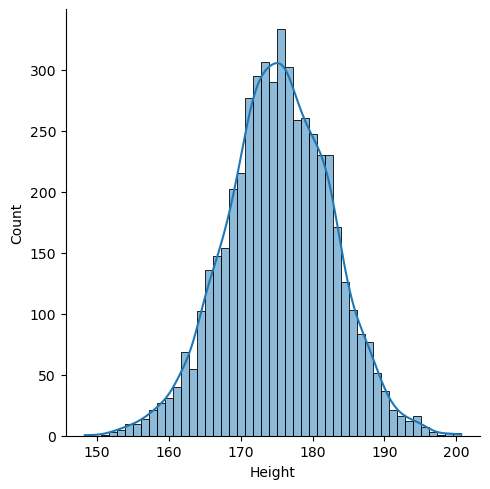

In [304]:
sns.displot(males['Height'], kde=True)

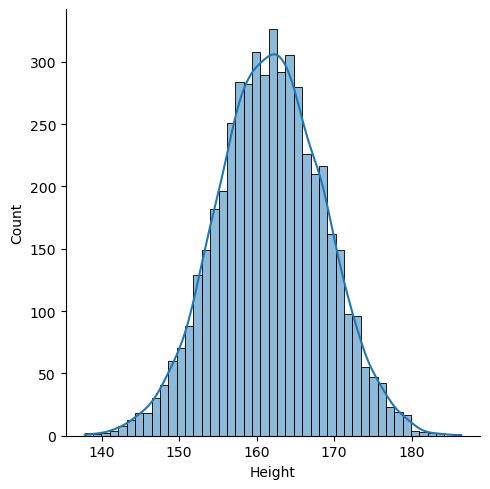

In [305]:
# Plotting the height
sns.displot(females['Height'], kde=True)

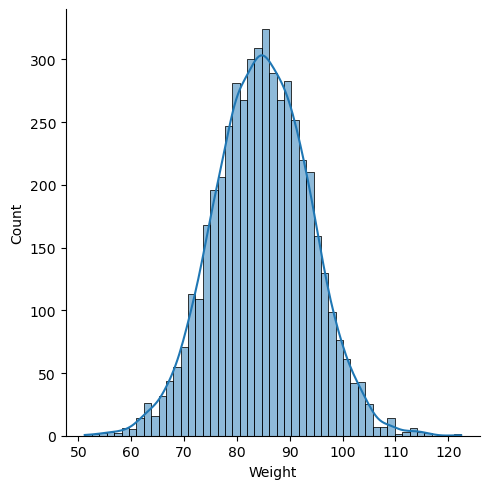

In [306]:
sns.displot(males['Weight'], kde=True)

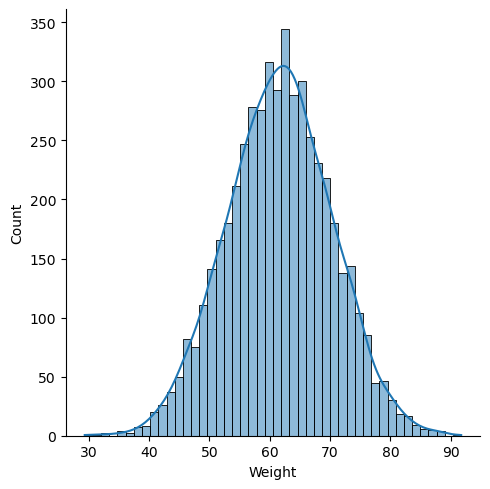

In [307]:
sns.displot(females['Weight'], kde=True)

In [308]:
stats.skew(males['Weight'])

0.001767809263208603

In [309]:
stats.skew(females['Weight'])

-0.013279182336161472

The plots for the height of both males and females fit the normal distribuition model.

Simulating the data

Height

According to https://www.worlddata.info/average-bodyheight.php and https://en.wikipedia.org/wiki/Average_human_height_by_country , the average height for a American men is 1.77 m and for women is 1.63 m.

After some research we could find that human heights are generally accepted to be normal distributed. (https://ourworldindata.org/human-height#height-is-normally-distributed). And that an acceptable standard deviation is for men is 7.49 cm and for women 6.96 cm. (add quotes ´´Regionally, the standard deviation of male heights is largest in North America and Australia, at 7.49 cm, with 6.96 cm in North America and Australia´´)




In [310]:
rng = np.random.default_rng()

In [311]:
males_height_sim = rng.normal(177, 7.49, 5000)

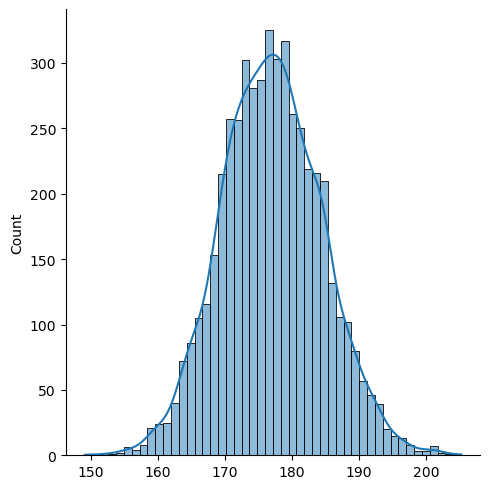

In [312]:
sns.displot(males_height_sim, kde=True)

Weight
According to https://www.cdc.gov/nchs/fastats/body-measurements.htm , the average weight for a American man is 90.6 kg and for American woman 77.1 kg. 

Using the standar deviation from our base sample 8.97 kg

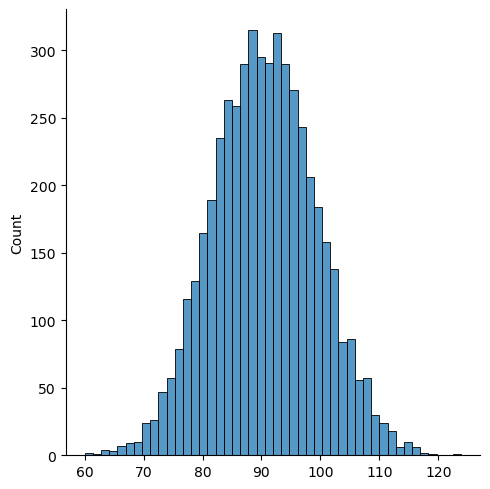

In [313]:
males_weight_sim = rng.normal(90.6, 8.97, 5000)
sns.displot(males_weight_sim)


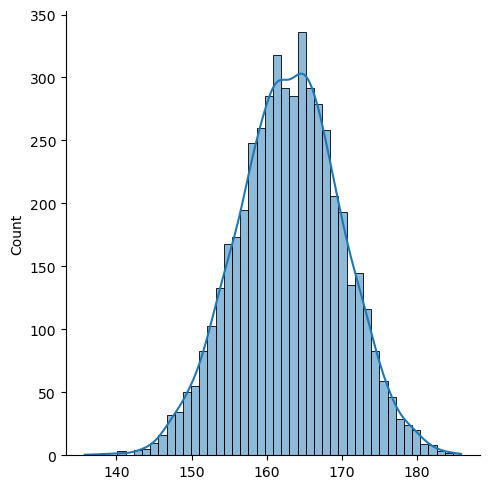

In [314]:
female_height_sim = rng.normal(163, 6.96, 5000)
sns.displot(female_height_sim, kde=True)

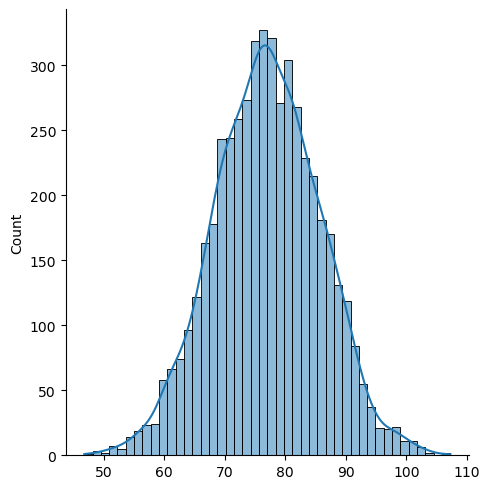

In [315]:
female_weight_sim = rng.normal(77.01, 8.62, 5000)
sns.displot(female_weight_sim, kde=True)

In [316]:
males_weight_sim

array([96.59960254, 79.48980203, 87.58867832, ..., 89.33476578,
       91.34698683, 71.00454315])

In [323]:
males_height_sim

array([180.43377184, 178.79006142, 180.77627337, ..., 175.89091754,
       174.98138989, 166.71559299])

In [318]:
# Simulating the BMI

In [326]:
males_bmi = (males_weight_sim)/(males_height_sim/100)**2

In [328]:
males_bmi

array([29.67151242, 24.86707294, 26.80187111, ..., 28.87577667,
       29.83393249, 25.54663449])

In [356]:
male= ['Male']
male=np.random.choice(male, 5000)

In [354]:
#Populating the male dfwith the simulated Data
df_male = pd.DataFrame(columns=['Gender', 'Height','Weight', 'BMI'])
df_male['Gender'] = male
df_male['Height'] = males_height_sim
df_male['Weight'] = males_weight_sim 
df_male['BMI'] = males_bmi

In [355]:
df_male

,Gender,Height,Weight,BMI
0,Male,180.433772,96.599603,29.671512
1,Male,178.790061,79.489802,24.867073
2,Male,180.776273,87.588678,26.801871
3,Male,182.646180,99.641209,29.868802
4,Male,169.368945,80.164186,27.945561
...,...,...,...,...
4995,Male,186.633079,92.187001,26.466252
4996,Male,179.980174,95.730879,29.553077
4997,Male,175.890918,89.334766,28.875777
4998,Male,174.981390,91.346987,29.833932


In [ ]:
female = ['Female']
female=np.random.choice(female, 5000)

In [357]:
female_bmi = (female_weight_sim)/(female_height_sim/100)**2
female_bmi

array([28.90964467, 31.15086016, 29.70939001, ..., 30.9972817 ,
       31.10296168, 22.2398317 ])

In [358]:
#Populating the Female DF
df_female = pd.DataFrame(columns=['Gender', 'Height','Weight', 'BMI'])
df_female['Gender'] = female
df_female['Height'] = female_height_sim
df_female['Weight'] = female_weight_sim 
df_female['BMI'] = female_bmi

In [359]:
df_female

,Gender,Height,Weight,BMI
0,Female,164.667859,78.389958,28.909645
1,Female,161.280999,81.028249,31.150860
2,Female,164.521960,80.415818,29.709390
3,Female,161.963823,84.113175,32.064760
4,Female,155.036969,74.829575,31.131693
...,...,...,...,...
4995,Female,165.121194,81.597320,29.927487
4996,Female,164.513278,78.385708,28.962429
4997,Female,157.296974,76.694522,30.997282
4998,Female,160.184101,79.806922,31.102962


In [366]:
# Concatenating both DF
bmi_df = pd.concat([df_male, df_female], ignore_index=True)

In [367]:
bmi_df

,Gender,Height,Weight,BMI
0,Male,180.433772,96.599603,29.671512
1,Male,178.790061,79.489802,24.867073
2,Male,180.776273,87.588678,26.801871
3,Male,182.646180,99.641209,29.868802
4,Male,169.368945,80.164186,27.945561
...,...,...,...,...
9995,Female,165.121194,81.597320,29.927487
9996,Female,164.513278,78.385708,28.962429
9997,Female,157.296974,76.694522,30.997282
9998,Female,160.184101,79.806922,31.102962
